In [ ]:
from IPython.display import Image

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mlp

In [ ]:
df = pd.read_csv("data_2_cat.csv")

In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
df['tier'] = df['tier'].replace(['First','Second'],['1','2'])
df['tier'] = df['tier'].astype(float)

In [ ]:
df = df.drop('Country',axis=1)

In [ ]:
df = df.drop('Happiness Rank',axis=1)

In [ ]:
df = df.drop('Happiness Score',axis=1)

In [ ]:
df.head()

,Year,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
0,2015,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.0
1,2015,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1.0
2,2015,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0
3,2015,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1.0
4,2015,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1.0


In [ ]:
df['tier'].mask(df['tier'] == 1, 0, inplace=True)
df['tier'].mask(df['tier'] == 2, 1, inplace=True)

In [ ]:
df.head()

,Year,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
0,2015,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0.0
1,2015,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0.0
2,2015,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0.0
3,2015,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0.0
4,2015,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0.0


In [ ]:
from sklearn.model_selection import train_test_split
# Creating independent and dependent variables
X = df.drop('tier',axis=1)
y = df['tier']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
#print(f"Train Data: {X_train.shape}, {y_train.shape}")
#print(f"Train Data: {X_test.shape}, {y_test.shape}")

## Use k-means clustering to find clusters in your data set.

In [ ]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)

In [ ]:
y_pred = kmeans.fit_predict(X)

## Evaluate the accuracy of this clustering

In [ ]:
from sklearn.metrics import accuracy_score

print(f"Accuracy  is: {accuracy_score(y, y_pred)}")

Accuracy  is: 0.49516648764769067


## visualize the clusters

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# PCA
pca_scaled_std = PCA(n_components=2,random_state=42)
X_pca = pca_scaled_std.fit_transform(X)

In [ ]:
label_0 = X[y_pred == 0]
label_1 = X[y_pred == 1]

In [ ]:
centroids = kmeans.cluster_centers_

Let's visualize the kmeans clusters by comparing GDP per Capita and Life Expectancy

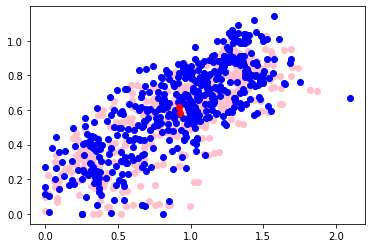

In [ ]:
plt.scatter(label_0["GDP per Capita"],label_0["Life Expectancy"],c='pink')
plt.scatter(label_1["GDP per Capita"],label_1["Life Expectancy"],c='blue')
plt.scatter(centroids[:, 1], centroids[:, 3], c='red')
plt.show()

## try different clustering algorithms for hard and soft clustering.

- hard clustering : assigning each instance to a single cluster
- soft clustering : it can be useful to give each instance a score per cluster



### Soft clustering :


#### Expectation Maximization Clustering (EM)
https://towardsdatascience.com/implement-expectation-maximization-em-algorithm-in-python-from-scratch-f1278d1b9137

https://iq.opengenus.org/expectation-maximization-clustering-algorithm/

https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

EM is an iterative algorithm to find the maximum likelihood when there are latent variables. The algorithm iterates between performing an expectation (E) step, which creates a heuristic of the posterior distribution and the log-likelihood using the current estimate for the parameters, and a maximization (M) step, which computes parameters by maximizing the expected log-likelihood from the E step. The parameter-estimates from M step are then used in the next E step. 

expectation maximization algorithm is a Gaussian mixture model

#### Fuzzy C-Means 

https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html

flexible algorithm that extends the concepts of k-means to soft clustering scenarios

It is based on the fuzzy logic and is often referred to as the FCM algorithm.

The way FCM works is that the items are assigned probabilities which are essentially expressing the strength of the belonging of the item into the cluster.

A membership vector is created during the FCM process which expresses the probability of the membership, ranging from 0 to 1 that indicates how similar an item is to the mean of the cluster

#### Gaussian Mixture Model GMM 

https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

This model assumes that clusters in Python can be modeled using a Gaussian distribution. Gaussian distributions, informally known as bell curves, are functions that describe many important things like population heights and weights.

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=2)

In [ ]:
y_pred_gmm = gmm.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_gmm)}")

Accuracy  is: 0.5091299677765844


In [ ]:
label_0_gmm = X[y_pred_gmm == 0]
label_1_gmm = X[y_pred_gmm == 1]

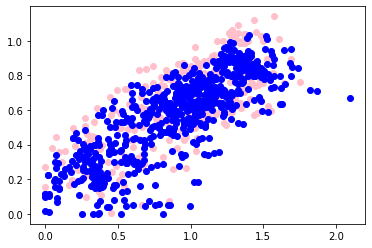

In [ ]:
plt.scatter(label_0_gmm["GDP per Capita"],label_0_gmm["Life Expectancy"],c='pink')
plt.scatter(label_1_gmm["GDP per Capita"],label_1_gmm["Life Expectancy"],c='blue')
plt.show()

### Hard clustering


#### hierarchical clustering

https://www.askpython.com/python/examples/hierarchical-clustering

In Agglomerative Hierarchical Clustering, Each data point is considered as a single cluster making the total number of clusters equal to the number of data points. And then we keep grouping the data based on the similarity metrics, making clusters as we move up in the hierarchy. This approach is also called a bottom-up approach.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

In [ ]:
y_pred_h = agg_clustering.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_h)}")

Accuracy  is: 0.6616541353383458


In [ ]:
label_0_h = X[y_pred_h == 0]
label_1_h = X[y_pred_h == 1]

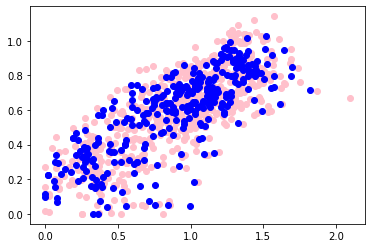

In [ ]:
plt.scatter(label_0_h["GDP per Capita"],label_0_h["Life Expectancy"],c='pink')
plt.scatter(label_1_h["GDP per Capita"],label_1_h["Life Expectancy"],c='blue')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [ ]:
#Linkage Matrix
Z = linkage(X, method = 'ward')

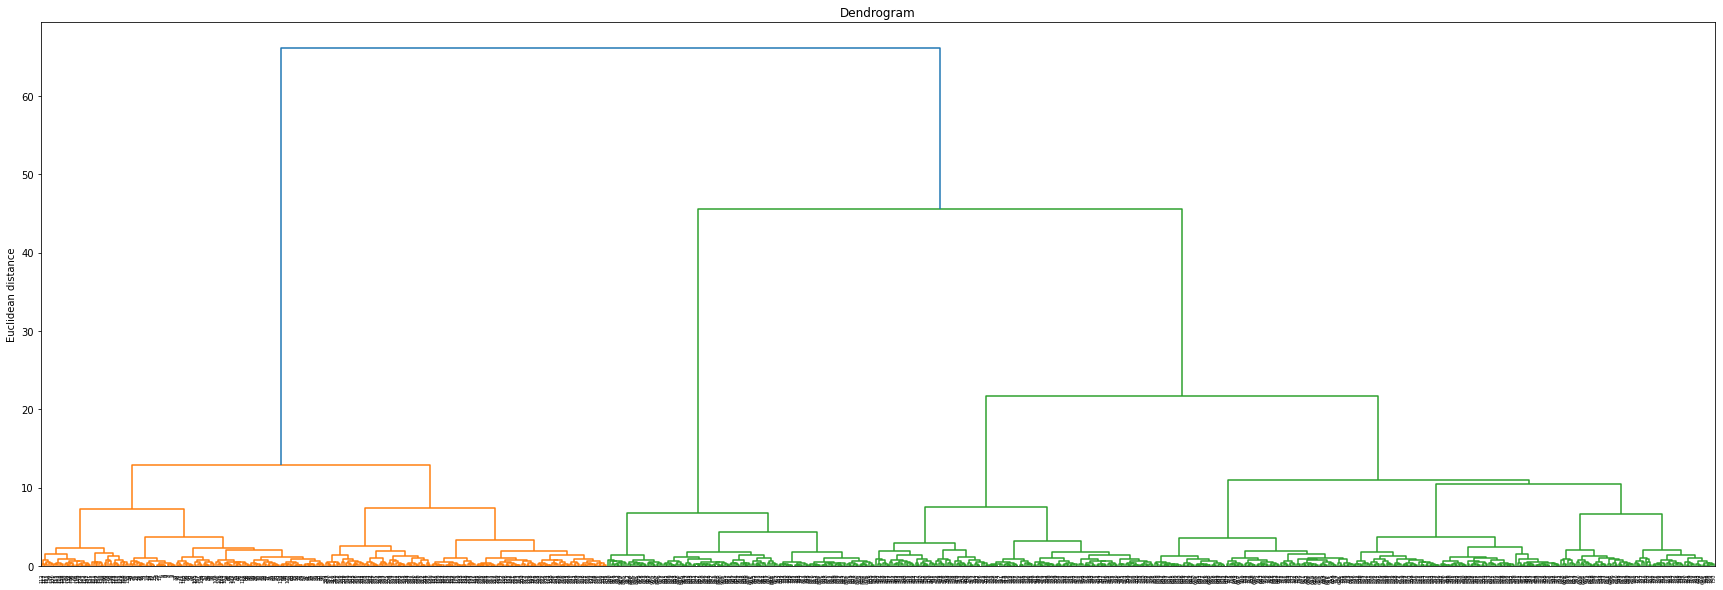

In [ ]:
#plotting dendrogram
#check depth level
plt.figure(figsize = (30,10))
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

#### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

- Finds core samples of high density and expands clusters from them. 
- Good for data which contains clusters of similar density.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# epsfloat, default=0.5
# The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. 
dbs = DBSCAN()

In [ ]:
y_pred_dbs = dbs.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_dbs)}")

Accuracy  is: 0.16970998925886144


In [ ]:
label_0_dbs = df[y_pred_dbs == 0]
label_1_dbs = df[y_pred_dbs == 1]

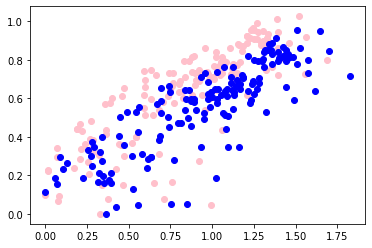

In [ ]:
plt.scatter(label_0_dbs["GDP per Capita"],label_0_dbs["Life Expectancy"],c='pink')
plt.scatter(label_1_dbs["GDP per Capita"],label_1_dbs["Life Expectancy"],c='blue')
plt.show()

#### Mean shift

https://towardsdatascience.com/understanding-mean-shift-clustering-and-implementation-with-python-6d5809a2ac40#:~:text=The%20implementation%20of%20mean%20shift%20clustering%20is%20relatively,estimate_bandwidth%20%28X%2C%20quantile%3D0.3%2C%20n_samples%3D300%29%20ms%20%3D%20MeanShift%20%28bandwidth%3Dbandwidth%29

Simply speaking, “mean shift” is equal to “shifting to the mean” in an iterative way. In the algorithm, every data point is shifting to the “regional mean” step by step and the location of the final destination of each point represents the cluster it belongs to.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
ms = MeanShift(bandwidth=2)

In [ ]:
y_pred_ms = ms.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_ms)}")

Accuracy  is: 0.6723952738990333


In [ ]:
label_0_ms = df[y_pred_ms == 0]
label_1_ms = df[y_pred_ms == 1]

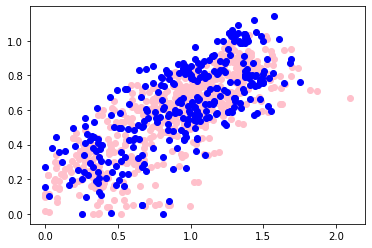

In [ ]:
plt.scatter(label_0_ms["GDP per Capita"],label_0_ms["Life Expectancy"],c='pink')
plt.scatter(label_1_ms["GDP per Capita"],label_1_ms["Life Expectancy"],c='blue')
plt.show()

## Try also to vary the number of clusters manually. How does it affect the accuracy of clustering?

#### K-means



In [ ]:
k = 6
kmeans5 = KMeans(n_clusters=k, random_state=42)

In [ ]:
y_pred_km5 = kmeans5.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_km5)}")

Accuracy  is: 0.16648764769065522


In [ ]:
k = 4
kmeans4 = KMeans(n_clusters=k, random_state=42)

In [ ]:
y_pred_km4 = kmeans4.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_km4)}")

Accuracy  is: 0.33404940923737914


#### GMM

In [ ]:
gmm2 = GaussianMixture(n_components=4)

In [ ]:
y_pred_gmm2= gmm2.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_gmm2)}")

Accuracy  is: 0.3394199785177229


In [ ]:
gmm3 = GaussianMixture(n_components=6)

In [ ]:
y_pred_gmm3= gmm3.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_gmm3)}")

Accuracy  is: 0.16004296455424274


#### Hierarchical

In [ ]:
h2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [ ]:
y_pred_h2= h2.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_h2)}")

Accuracy  is: 0.3383458646616541


In [ ]:
h3 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')

In [ ]:
y_pred_h3= h3.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_h3)}")

Accuracy  is: 0.2158968850698174


## Research some of the existing algorithms to compute the optimal number of clusters

https://realpython.com/k-means-clustering-python/

Inertia: It is the sum of squared distances of samples to their closest cluster center.

### Elbow method

In [ ]:
from sklearn import metrics

In [ ]:
kmeans_args = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

In [ ]:
sse = []

In [ ]:
for k  in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [ ]:
sse

[3939.039737359669,
 1379.050580610523,
 727.9329067813303,
 483.1519890435174,
 400.18672545526465,
 346.807559838139,
 285.3085539838008,
 254.47670917542337,
 224.53659869424592,
 197.92058482015267]

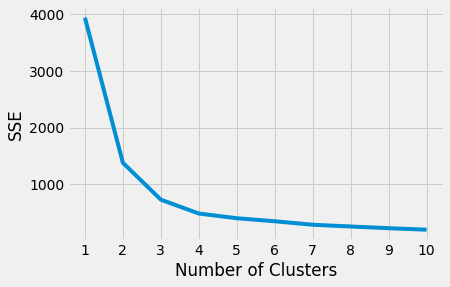

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [ ]:
kl.elbow

3

### The silouette method

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:
- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
silhouette_coefficients = []

In [ ]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(X)
    score = silhouette_score(X, y_pred, metric='euclidean')
    silhouette_coefficients.append(score)

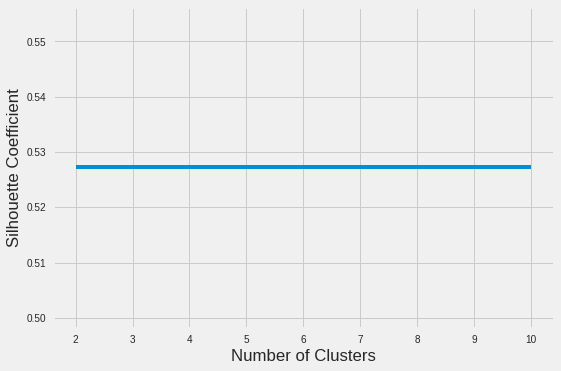

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

testing 3 clusters

In [ ]:
k = 3
kmeans6 = KMeans(n_clusters=k, random_state=42)

In [ ]:
y_pred_km6 = kmeans6.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_km6)}")

Accuracy  is: 0.3383458646616541


In [ ]:
h4 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [ ]:
y_pred_h4= h4.fit_predict(X)

In [ ]:
print(f"Accuracy  is: {accuracy_score(y, y_pred_h4)}")

Accuracy  is: 0.4221267454350161


## Conclusions

Here is a summary table of the accuracy results for different clustering methods:

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['clus1.PNG']))

Saving clus1.PNG to clus1 (2).PNG


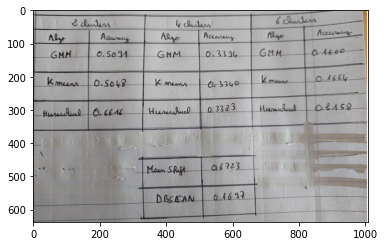

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

And here is the summary of results we got for Bayesian classification :

In [ ]:
uploaded = files.upload()
im2 = Image.open(BytesIO(uploaded['bays1.PNG']))

Saving bays1.PNG to bays1 (1).PNG


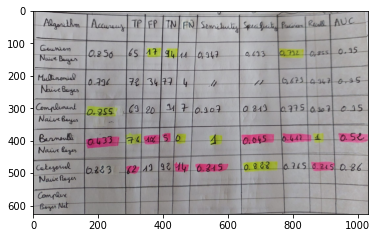

In [ ]:
plt.imshow(im2)
plt.show()

- The hierarchical clustering seems to perform best with our dataset according to the accuracy scores 
- Compared to the classification reults however the clustering methods are underperforming which is unsuprising as the classification methods had the help of a training set and in classification the classes are known in comparaison to clustering
- Clustering is difficult to evaluate, better eveluation could be achieved by techniques such as silhouette analysis and measure of magnitude and cardinality (will be added for the final portfolio)
- according to the elbow method an ideal number of clusters would be 3 but the accuracy scores point put 2 as the ideal number, our dataset is definitly hard to split into clusters seeing as we can see in the visualization where DBSCAN had the most defined clusters but the worst accuracy score, DBSCAN is a density based clustering that can have arbitrary shapes which makes it more accurate hoewever when we have variable density clusters we get poor results 
- We've tried clustering methods of the 4most common classes :
    - Distribution based :  GMM
    - Centroid based : Kmeans
    - Connectivity based : hierarchical
    - Density based : DBSCAN, mean shift
- As GMM is a soft clustering method, it uses probablity for clustering and always has a degree of uncertainty when assigning a data point to a cluster, this approach is safer when we don't know much about the dataset. The most important condition is that the dataset follows the Gaussian distribution (will be checked for the final portoflio)
- Kmeans is easy to implement but all it really does is partition rather than cluster, in our case we know a lot about our datasest so kmeans isn't that bad of a choice since we can guess a good range for clusters (k). Kmeans focucses on the center of the cluster and neglects the borders.
- Hierarchical assumes all data belongs to a cluster and that there is no noise so every datapoint is merged in a cluster, this might explain the high accuracy results, just like for kmeans our knowledge of the dataset comes in handy for choosing the number of clusters 
-  Mean shift and DBSCAN showed the best clusters in visualization since they work with a "distance" parameter, the reults however are more due to luck in the choice of parameters since the output grah varies significantly with a change in eps for DBSCAN and bandwith for meanshift, seeing how close the clusters in our datasets are neither might be the ideal choice for clustering.
